# Intoduction

Uber is a ride-sharing company that connects riders with drivers through its app, revolutionizing urban transportation. The dataset
provided by the NYC Taxi & Limousine Commission (TLC) contains trip-level data for millions of Uber pickups in New York City between 
2014 and 2015. This data allows us to explore patterns in ride frequency, timing, and location. In this analysis, we will apply the 
ETL (Extract, Transform, Load) process to perform exploratory data analysis (EDA) on Uber's operations, uncovering insights into 
the service’s impact on the city's transportation system.

# Loading Modules

In [1]:
#Data processing
import pandas as pd
import numpy as np

# Data visulaisation
import seaborn as sns
import matplotlib.pyplot as plt

# Warning Handling
import warnings
warnings.filterwarnings('ignore')

# Extract data

In [2]:
# Load the datasets
df_apr14 = pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv')
df_may14 = pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv')
df_jun14 = pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv')
df_jul14 = pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv')
df_aug14 = pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv')
df_sep14 = pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv')

In [3]:
#Merge the dataframes into one
uber_data = pd.concat([df_apr14, df_may14, df_jun14, df_jul14, df_aug14, df_sep14], ignore_index=True)
uber_data.head(10)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
5,4/1/2014 0:33:00,40.7383,-74.0403,B02512
6,4/1/2014 0:39:00,40.7223,-73.9887,B02512
7,4/1/2014 0:45:00,40.7620,-73.9790,B02512
8,4/1/2014 0:55:00,40.7524,-73.9960,B02512
9,4/1/2014 1:01:00,40.7575,-73.9846,B02512


In [4]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [5]:
uber_data.shape

(4534327, 4)

In [6]:
def check_and_remove_duplicates(uber_data):
    # Check for duplicates
    if uber_data.duplicated().any():
        duplicate_count = uber_data.duplicated().sum()
        print(f"Found {duplicate_count} duplicate rows.")
    else:
        print("No duplicate rows found.")

 # Remove duplicates
    uber_data.drop_duplicates(inplace=True)

    # Verify after removal
    if uber_data.duplicated().any():
        duplicate_count = uber_data.duplicated().sum()
        print(f"After removal, {duplicate_count} duplicate rows remain.")
    else:
        print("All duplicates have been removed.")


# Call the function
check_and_remove_duplicates(uber_data)


Found 82581 duplicate rows.
All duplicates have been removed.


In [7]:
# Check for missing values
if uber_data.isnull().any().any():
    missing_counts = uber_data.isnull().sum()
    print("Missing values found in the dataset:")
    print(missing_counts[missing_counts > 0])  # Print only columns with missing values
else:
    print("No missing values found in the dataset.")

# Remove rows with missing values
uber_data.dropna(inplace=True)

# Verify after handling missing values
if uber_data.isnull().any().any():
    print("Missing values still exist after handling.")
    print(uber_data.isnull().sum())
else:
    print("All missing values have been successfully handled.")

No missing values found in the dataset.
All missing values have been successfully handled.


In [8]:
uber_data.shape

(4451746, 4)

In [9]:
uber_data.describe(include ='all')

,Date/Time,Lat,Lon,Base
count,4451746,4.451746e+06,4.451746e+06,4451746
unique,260093,NaN,NaN,5
top,4/7/2014 20:21:00,NaN,NaN,B02617
freq,97,NaN,NaN,1417983
mean,NaN,4.073924e+01,-7.397304e+01,NaN
std,NaN,3.984343e-02,5.721967e-02,NaN
min,NaN,3.965690e+01,-7.492900e+01,NaN
25%,NaN,4.072110e+01,-7.399650e+01,NaN
50%,NaN,4.074220e+01,-7.398340e+01,NaN
75%,NaN,4.076100e+01,-7.396530e+01,NaN


In [10]:
# Converting the Date_time type into Datetime
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])

# Adding useful columns
uber_data['Month'] = uber_data['Date/Time'].dt.month_name()
uber_data['Weekday'] = uber_data['Date/Time'].dt.day_name() 
uber_data['Day'] = uber_data['Date/Time'].dt.day
uber_data['Hour'] = uber_data['Date/Time'].dt.hour
uber_data['Minute'] = uber_data['Date/Time'].dt.minute

uber_data.head()

,Date/Time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33


In [11]:
uber_data.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
Month                object
Weekday              object
Day                   int32
Hour                  int32
Minute                int32
dtype: object

# Exploration and Visualization

# 2.1 Trips by month

In [12]:
# Plot Data
uber_data["month"] = uber_data["Date/Time"].dt.month_name()
uber_data["month"].value_counts()

month
September    1004099
August        813393
July          781969
June          653158
May           642360
April         556767
Name: count, dtype: int64

Plotting the results

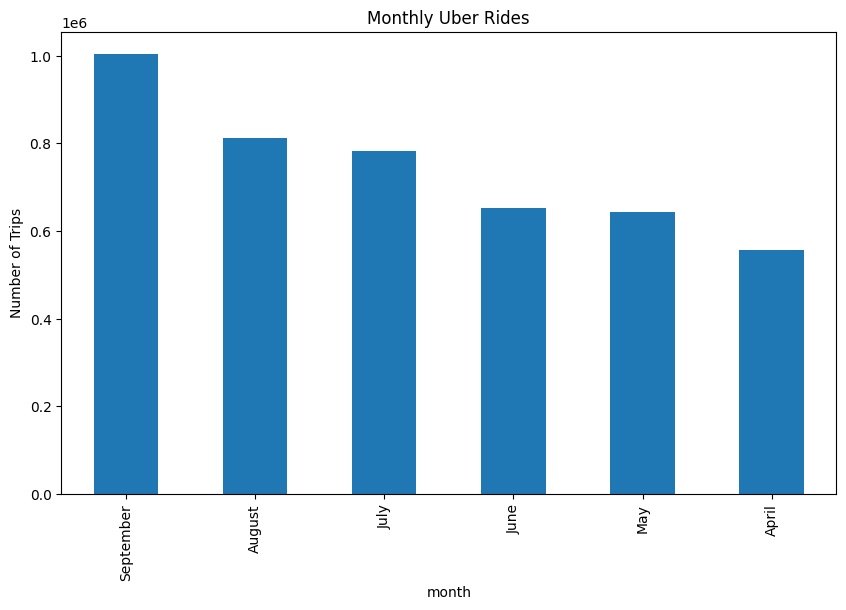

In [13]:
# Visualize using bar
month = uber_data["month"].value_counts()
month.plot(kind="bar", figsize=(10, 6))    
plt.ylabel("Number of Trips")  
plt.title("Monthly Uber Rides") 
plt.show()

# 2.2 Trips by Weekday

In [14]:
# Plot Data
uber_data["weekday"] = uber_data["Date/Time"].dt.day_name()
uber_data["weekday"].value_counts()

weekday
Thursday     741372
Friday       727532
Wednesday    683604
Tuesday      651753
Saturday     634194
Monday       532133
Sunday       481158
Name: count, dtype: int64

Plotting the results

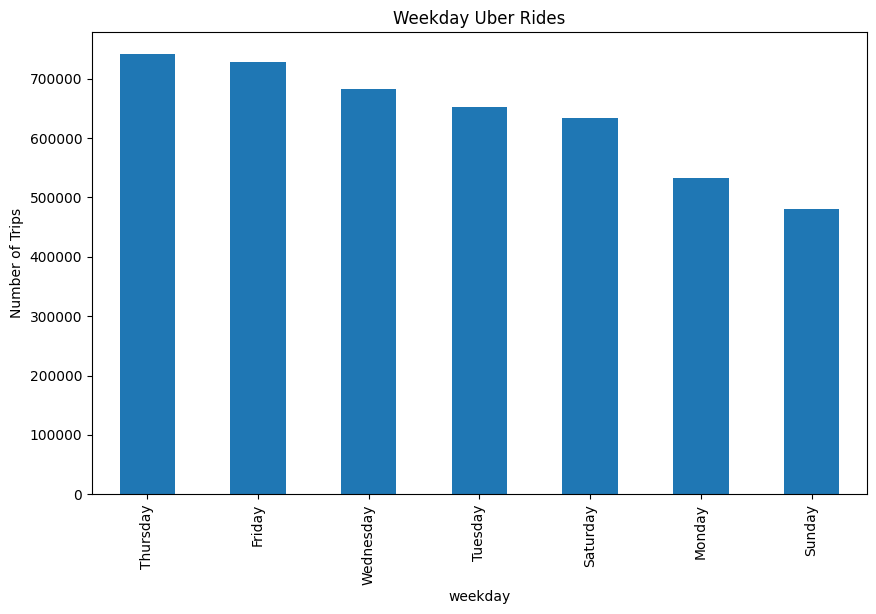

In [15]:
# Visualize using bar
weekday = uber_data["weekday"].value_counts()
weekday.plot(kind="bar", figsize=(10, 6))    
plt.ylabel("Number of Trips")  
plt.title("Weekday Uber Rides") 
plt.show()

# 2.3 Trips by hour

In [16]:
# Plot Data
uber_data["hour"] = uber_data["Date/Time"].dt.hour
uber_data["hour"].value_counts()

hour
17    330024
18    318584
16    307810
19    288836
20    279309
21    276183
15    270636
22    237424
14    226513
13    192427
7     189725
8     187166
12    167361
23    166077
11    162687
9     157316
10    156455
6     140599
0     101876
5      82350
1      65913
4      54246
3      47331
2      44898
Name: count, dtype: int64

Plotting the results

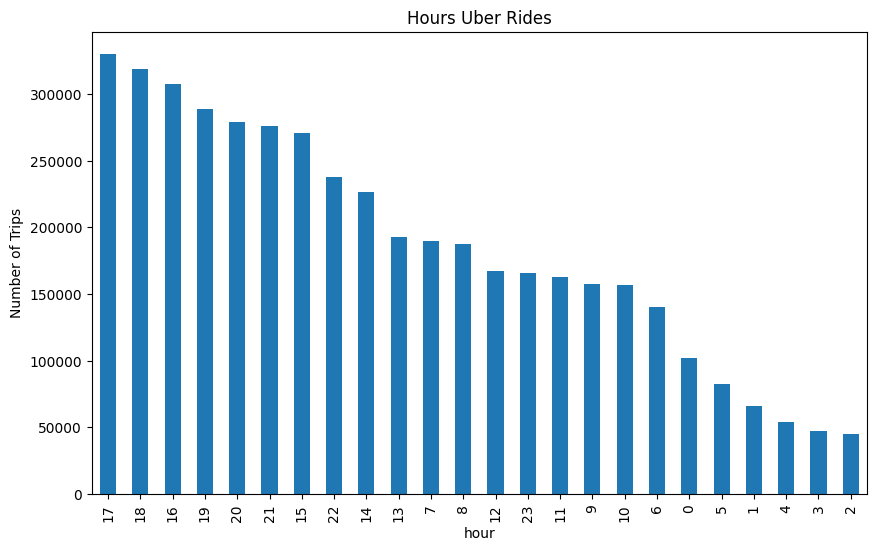

In [17]:
# Visualize using bar
day = uber_data["hour"].value_counts()
day.plot(kind="bar", figsize=(10, 6))    
plt.ylabel("Number of Trips")  
plt.title("Hours Uber Rides") 
plt.show()

# 2.4 Trips by weekday and month

In [18]:
# Extract month and weekday from the Date/Time column
uber_data["month"] = uber_data["Date/Time"].dt.month_name()
uber_data["weekday"] = uber_data["Date/Time"].dt.day_name()

# Group by month and weekday, counting the number of trips
month_weekday_grouped = uber_data.groupby(["month", "weekday"]).size().unstack()

# View the grouped data
month_weekday_grouped.head(10)

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,88985,60075,76152,50524,83954,89957,107120
August,145719,90011,129668,108168,121655,105160,113012
July,100987,91672,88626,74976,145791,134968,144949
June,103352,93261,80084,78369,113439,86706,97947
May,131880,62915,101583,55244,126919,75537,88282
September,156609,134199,158081,113877,149614,159425,132294


Plotting the results

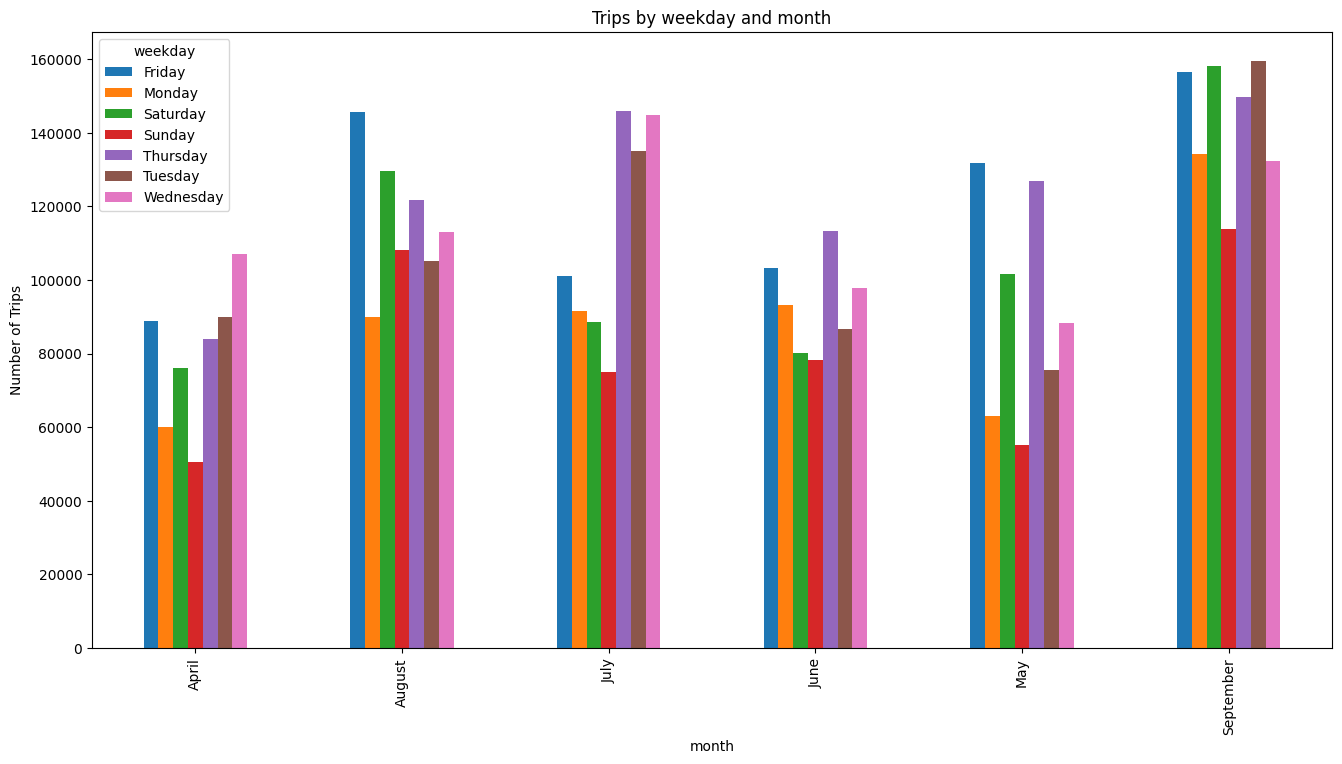

In [19]:
month_weekday_grouped.plot(kind="bar", figsize=(16, 8))    
plt.ylabel("Number of Trips")  
plt.title("Trips by weekday and month") 
plt.show()

# 2.5 Trips by weekday and month

In [20]:
# Extract month and weekday from the Date/Time column
uber_data["month"] = uber_data["Date/Time"].dt.month_name()
uber_data["day"] = uber_data["Date/Time"].dt.day

# Group by month and weekday, counting the number of trips
month_day_grouped = uber_data.groupby(["month", "day"]).size().unstack()

# View the grouped data
month_day_grouped.head(10)

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
April,14376.0,17230.0,20482.0,26353.0,19273.0,13248.0,19319.0,15996.0,16631.0,19785.0,...,16710.0,20047.0,22992.0,24691.0,24565.0,14452.0,15270.0,22516.0,35718.0,NaN
August,31686.0,28135.0,22736.0,24458.0,27592.0,29828.0,32102.0,29844.0,25876.0,20222.0,...,28912.0,26528.0,21602.0,21710.0,24045.0,26468.0,27999.0,26843.0,23426.0,22782.0
July,20875.0,26040.0,21208.0,13921.0,10693.0,11253.0,18014.0,25320.0,27308.0,29974.0,...,28456.0,33367.0,31455.0,29469.0,27189.0,22196.0,23539.0,27126.0,30134.0,32941.0
June,15755.0,17222.0,22282.0,22454.0,27918.0,24271.0,20574.0,15536.0,22912.0,22490.0,...,16043.0,17462.0,20478.0,25973.0,28035.0,24502.0,20829.0,16771.0,18169.0,NaN
May,23009.0,23901.0,21973.0,13668.0,17614.0,19018.0,21488.0,27081.0,25954.0,22144.0,...,26411.0,26005.0,14482.0,10722.0,10031.0,16773.0,21852.0,24533.0,24000.0,21014.0
September,19581.0,28239.0,32007.0,37507.0,41457.0,39695.0,29486.0,29753.0,33819.0,35100.0,...,27628.0,29567.0,30519.0,37218.0,36538.0,38424.0,28924.0,28478.0,32593.0,NaN


Plotting the results

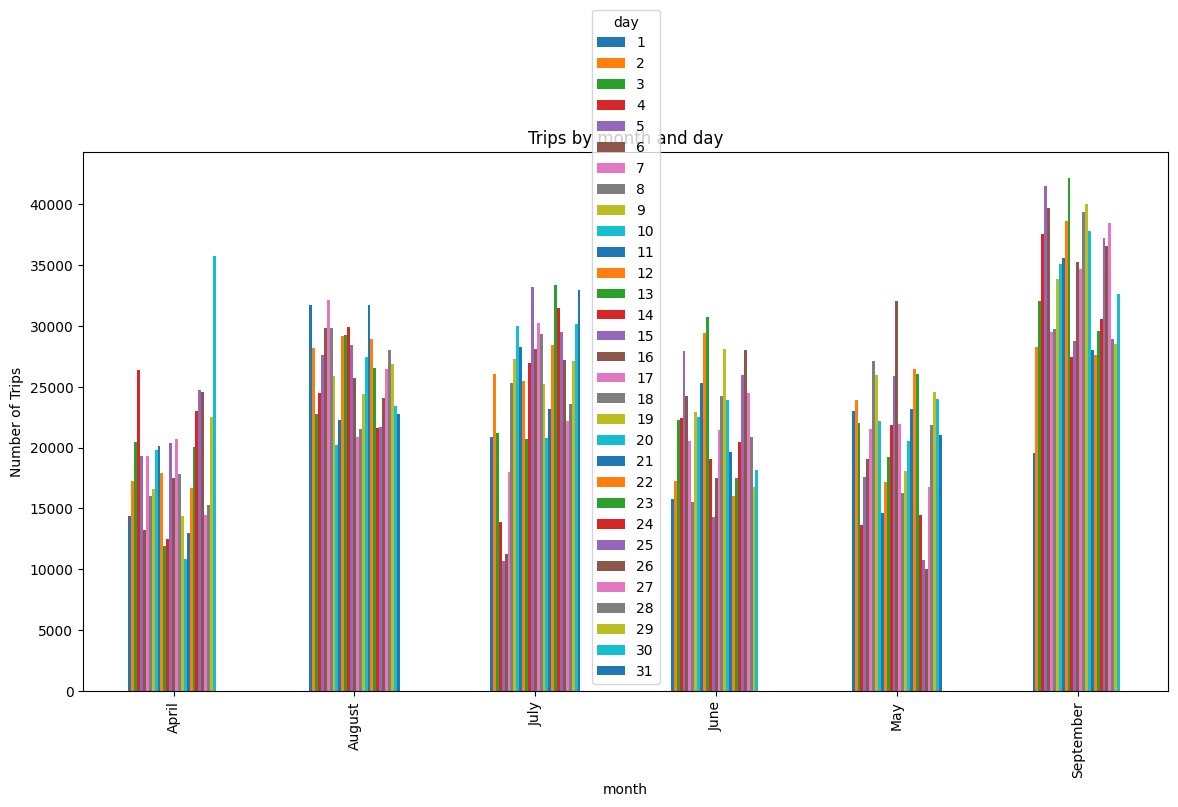

In [21]:
month_day_grouped.plot(kind="bar", figsize=(14, 7))    
plt.ylabel("Number of Trips")  
plt.title("Trips by month and day") 
plt.show()

# 2.6 Busiest Times for Uber Pickup

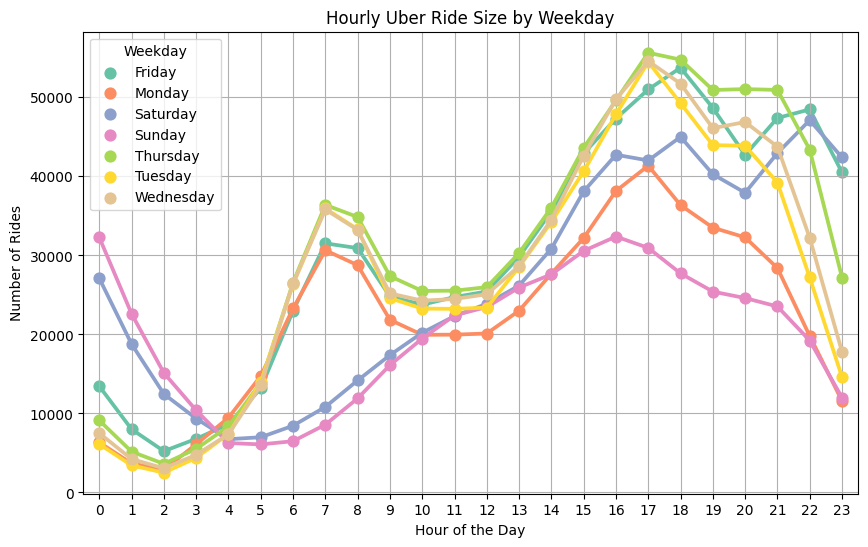

In [22]:
# Group by weekday and hour, then count the number of rides
weekday_hour = uber_data.groupby(["weekday", "hour"]).size().reset_index(name="size")

# Set the figure size
plt.figure(figsize=(10, 6))
sns.pointplot(x="hour", y="size", hue="weekday", data=weekday_hour, palette="Set2")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.title("Hourly Uber Ride Size by Weekday")
plt.legend(title="Weekday")
plt.grid(True)
plt.show()


# 2.7 The Highest Pickup Counts base on locations

In [23]:
# Group by 'Base' and 'hour', then count the number of trips
trips_by_loc = uber_data.groupby(["Base", "hour"]).size().reset_index(name="Number of Trips")

# View the grouped data
print(trips_by_loc.head())

     Base  hour  Number of Trips
0  B02512     0             3495
1  B02512     1             2081
2  B02512     2             1446
3  B02512     3             1544
4  B02512     4             1774


Plotting the results

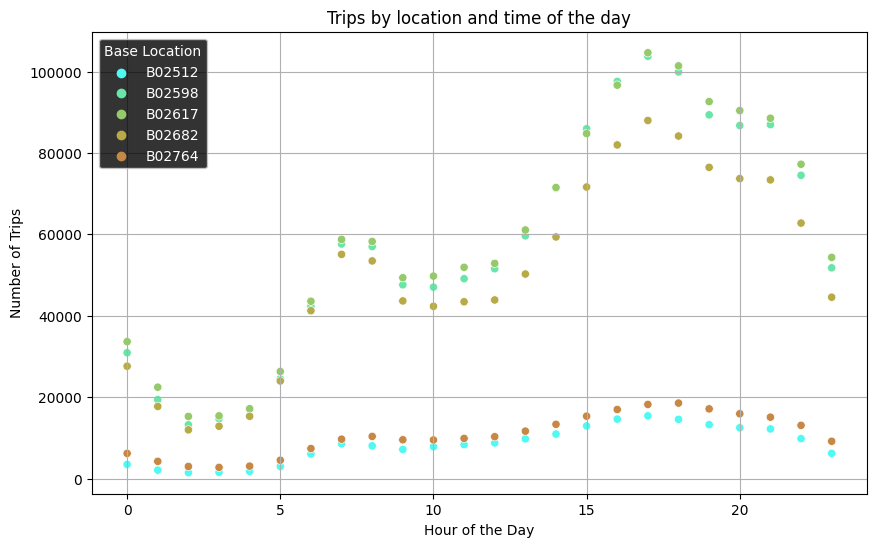

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="hour", y="Number of Trips", hue="Base", data=trips_by_loc,
            palette=['#50F9F1','#6AE5A8','#96C96A','#B7AA47','#C78845'])
plt.style.use("dark_background")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Trips by location and time of the day")
plt.legend(title="Base Location")
plt.grid(True)
plt.show()

# 2.8 Plot Uber Trip Locations:

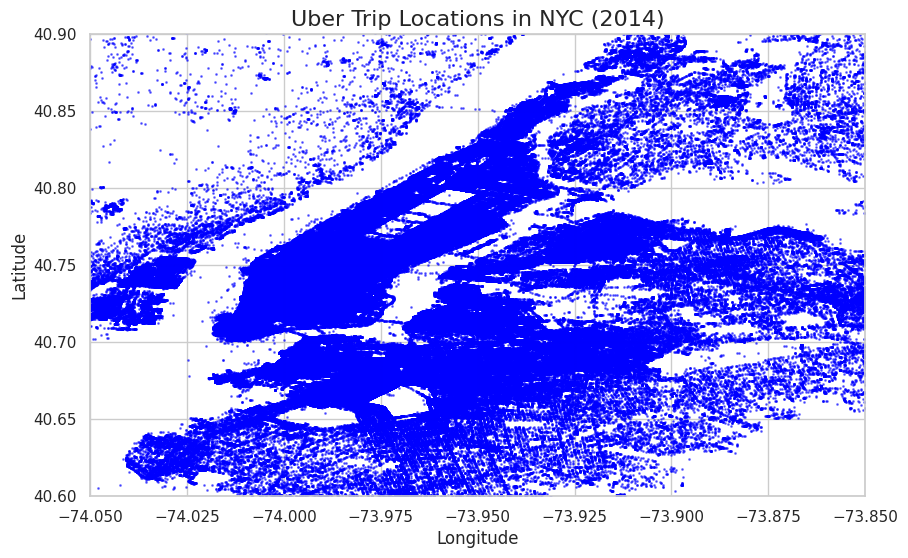

In [25]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot of Uber trip locations (Longitude vs Latitude)
plt.figure(figsize=(10, 6))
plt.scatter(uber_data['Lon'], uber_data['Lat'], c='blue', s=1, alpha=0.5)

# Set the title and labels
plt.title("Uber Trip Locations in NYC (2014)", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Optionally, limit the axis to zoom in on New York City area
plt.xlim(-74.05, -73.85)
plt.ylim(40.6, 40.9)

# Show the plot
plt.show()